# MNIST손글씨 인식하기 - Convolutional Neural Network 적용

## 라이브러리 로드

In [1]:
# 텐서플로우 관련 라이브러리
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 시각화 관련 라이브러리 
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
%matplotlib inline

# seed값 설정
seed = 0
np.random.seed = seed
tf.random.set_seed(3)

## 데이터 로드 

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = utils.to_categorical(Y_train, 10)
Y_test  = utils.to_categorical(Y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


## 컨볼류션 신경망 설정

In [3]:
model = Sequential()
# 필터갯수 : 32
# 커널 사이즈 : (3, 3)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', 
                 input_shape = (28, 28, 1))) # 행, 열, 색상(1 - 흑백)
# 필터갯수 64                 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 출력층 10,  활성화함수 - softmax
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='categorical_crossentropy')

## 모델 최적화 설정

In [4]:
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}- {val_loss:.4f}.hdfs"

# 가장 최적으로 모델을 저장하고, 10번정도가 val_loss값의 개선이 없으면 중단
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)
early_stopping_callbacks = EarlyStopping(monitor='val_loss',
                                         patience=10)

## 모델 실행

In [5]:
# 샘플 200개를 모두 30번 실행
# 테스트셋으로 모델의 성과를 측정

history = model.fit(X_train, Y_train, batch_size = 200, epochs=30,
          validation_data = (X_test, Y_test),
          verbose=0,
          callbacks=[checkpointer, early_stopping_callbacks])


Epoch 00001: val_loss improved from inf to 0.05337, saving model to ./model/01- 0.0534.hdfs
INFO:tensorflow:Assets written to: ./model/01- 0.0534.hdfs/assets

Epoch 00002: val_loss improved from 0.05337 to 0.03958, saving model to ./model/02- 0.0396.hdfs
INFO:tensorflow:Assets written to: ./model/02- 0.0396.hdfs/assets

Epoch 00003: val_loss improved from 0.03958 to 0.03666, saving model to ./model/03- 0.0367.hdfs
INFO:tensorflow:Assets written to: ./model/03- 0.0367.hdfs/assets

Epoch 00004: val_loss improved from 0.03666 to 0.03366, saving model to ./model/04- 0.0337.hdfs
INFO:tensorflow:Assets written to: ./model/04- 0.0337.hdfs/assets

Epoch 00005: val_loss improved from 0.03366 to 0.03172, saving model to ./model/05- 0.0317.hdfs
INFO:tensorflow:Assets written to: ./model/05- 0.0317.hdfs/assets

Epoch 00006: val_loss improved from 0.03172 to 0.02914, saving model to ./model/06- 0.0291.hdfs
INFO:tensorflow:Assets written to: ./model/06- 0.0291.hdfs/assets

Epoch 00007: val_loss did

## 성능 측정 및 시각화
* 테스트셋의 정확도 및 오차
* 학습셋의 오차

In [6]:
help(history.history)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg

In [10]:
# 테스트셋의 정확도 
print("\n Test Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))   # loss vlaue와 metrics vlaue를 리턴

# 테스트셋의 오차 
display(history.history.items())
display(history.history.keys())  # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
y_vloss = history.history['val_loss']

# 학습셋의 오차 
y_loss = history.history['loss']

313/313 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9919

 Test Accuracy : 0.9919


dict_items([('loss', [0.27203938364982605, 0.09015257656574249, 0.06637904793024063, 0.055010657757520676, 0.045456647872924805, 0.041542839258909225, 0.03688119724392891, 0.03307868912816048, 0.028882263228297234, 0.02876339480280876, 0.024044394493103027, 0.021798351779580116, 0.022068222984671593, 0.02039462700486183, 0.01897275447845459, 0.018285656347870827, 0.017661916092038155, 0.016193265095353127, 0.015275373123586178, 0.014573849737644196, 0.013778558000922203, 0.012540783733129501, 0.013884280808269978]), ('accuracy', [0.9172833561897278, 0.9731166958808899, 0.9793499708175659, 0.9829166531562805, 0.9856333136558533, 0.9868000149726868, 0.9882833361625671, 0.989466667175293, 0.9905833601951599, 0.9905666708946228, 0.9923333525657654, 0.9928666949272156, 0.9926333427429199, 0.9930999875068665, 0.9936500191688538, 0.993483304977417, 0.994183361530304, 0.9943666458129883, 0.9946833252906799, 0.9950666427612305, 0.9950666427612305, 0.9956666827201843, 0.9952333569526672]), ('val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

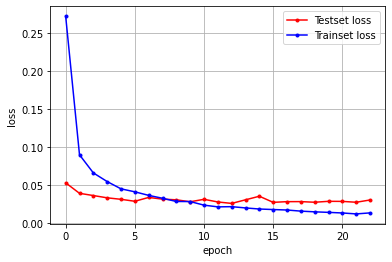

In [13]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 실행결과를 보면 14번째 에포크에서 베스트모델을 만들었고, Test Accuracy : 0.9919 이다.
* 100개의 이미지 중 99개정도를 맞춘다는 의미.